In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\Users\user\Desktop\car class price prediction\carclass\cars_class (1).csv")

In [7]:
df=df.drop(columns="ID")

In [8]:
df.head(3)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3


In [9]:
df.shape

(719, 19)

In [10]:
df.shape

(719, 19)

In [13]:
df=df.dropna()#drop null values

In [14]:
df=df.drop_duplicates()#drop duplicates

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Comp          719 non-null    int64
 1   Circ          719 non-null    int64
 2   D.Circ        719 non-null    int64
 3   Rad.Ra        719 non-null    int64
 4   Pr.Axis.Ra    719 non-null    int64
 5   Max.L.Ra      719 non-null    int64
 6   Scat.Ra       719 non-null    int64
 7   Elong         719 non-null    int64
 8   Pr.Axis.Rect  719 non-null    int64
 9   Max.L.Rect    719 non-null    int64
 10  Sc.Var.Maxis  719 non-null    int64
 11  Sc.Var.maxis  719 non-null    int64
 12  Ra.Gyr        719 non-null    int64
 13  Skew.Maxis    719 non-null    int64
 14  Skew.maxis    719 non-null    int64
 15  Kurt.maxis    719 non-null    int64
 16  Kurt.Maxis    719 non-null    int64
 17  Holl.Ra       719 non-null    int64
 18  Class         719 non-null    int64
dtypes: int64(19)
memory usage: 10

In [16]:
df.columns

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra', 'Class'],
      dtype='object')

In [17]:
columns=['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class']

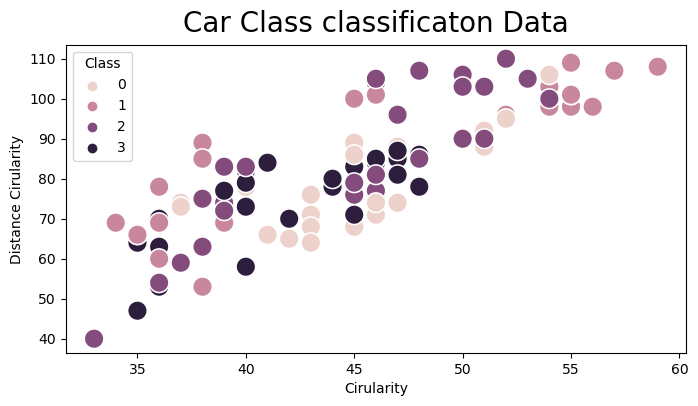

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Circ', y='D.Circ', hue='Class', data=df.head(100), s=200)
plt.title("Car Class classificaton Data", y=1.015, fontsize=20)
plt.xlabel("Cirularity")
plt.ylabel("Distance Cirularity")
ax = plt.gca()

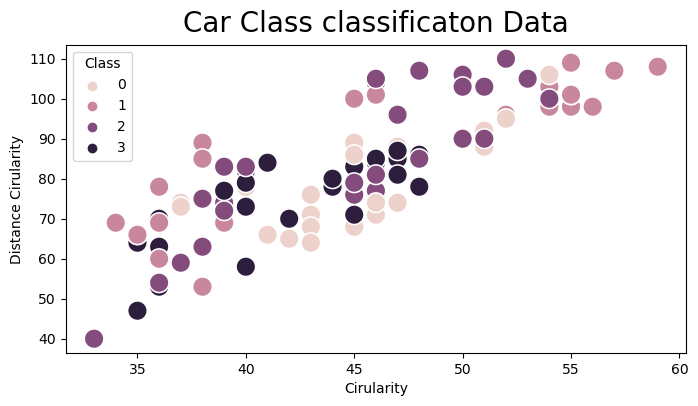

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Circ', y='D.Circ', hue='Class', data=df.head(100), s=200)
plt.title("Car Class classificaton Data", y=1.015, fontsize=20)
plt.xlabel("Cirularity")
plt.ylabel("Distance Cirularity")
ax = plt.gca()

<Axes: xlabel='Class', ylabel='count'>

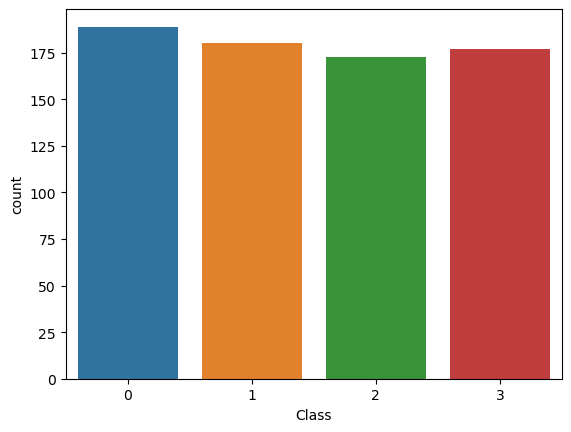

In [22]:
#check for imbalance data
import seaborn as sns
sns.countplot(data=df,x="Class")

In [23]:
df.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


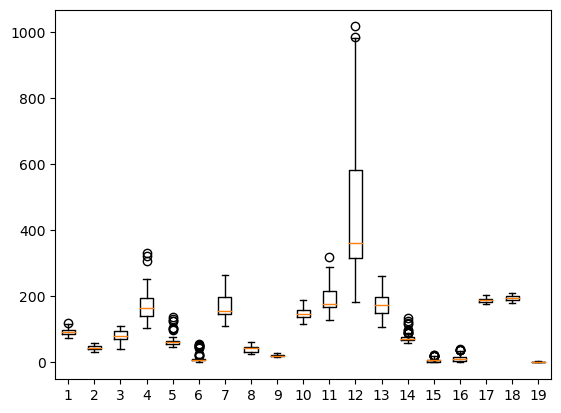

In [24]:
#check for outliers
import matplotlib.pyplot as plt
plt.boxplot(df)
plt.show()

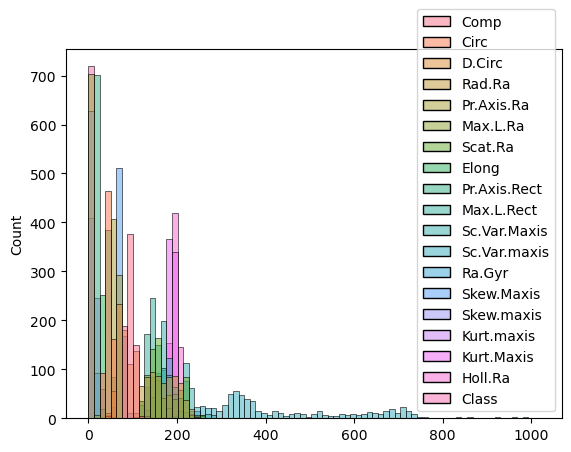

In [25]:
#distibution of data
sns.histplot(df)
plt.show()

In [26]:
X=df.drop(columns="Class")
y=df.Class

In [27]:
print(X.shape)
print(y.shape)

(719, 18)
(719,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #split data into train and test, 20% of data is kept for test pur

In [29]:
print(X_train.shape)
print(X_test.shape)

(575, 18)
(144, 18)


In [30]:
print(y_train.shape)
print(y_test.shape)

(575,)
(144,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scale=sc.fit_transform(X_train)
X_test_scale=sc.transform(X_test)

In [32]:
X_train_scale.shape

(575, 18)

In [33]:
X_train_scale.mean()

2.5401044660022906e-17

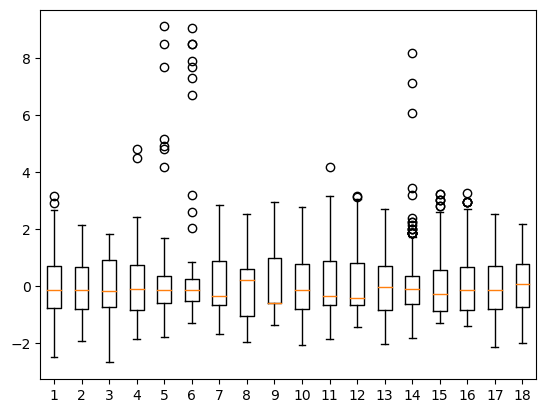

In [34]:
import matplotlib.pyplot as plt
plt.boxplot(X_train_scale)
plt.show()

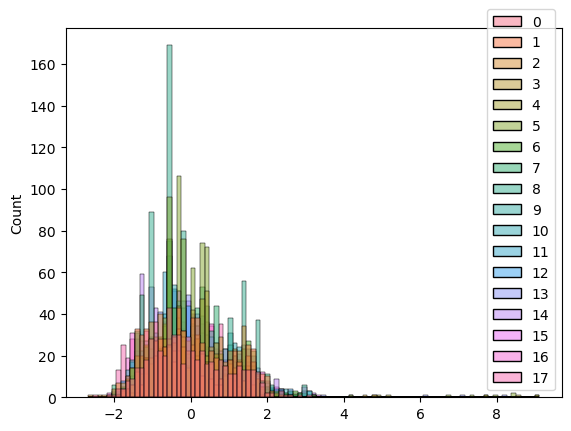

In [35]:
#Distribution of data after scaling
sns.histplot(X_train_scale)
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score

In [37]:

knn = KNeighborsClassifier(4)
knn.fit(X_train_scale,y_train)
knn_score=knn.score(X_test_scale,y_test)
print("Accuracy:",knn_score, "   ","f1_score:",f1_score(y_test,knn.predict(X_test_scale),average='macro'))

Accuracy: 0.7291666666666666     f1_score: 0.7208890194883404


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

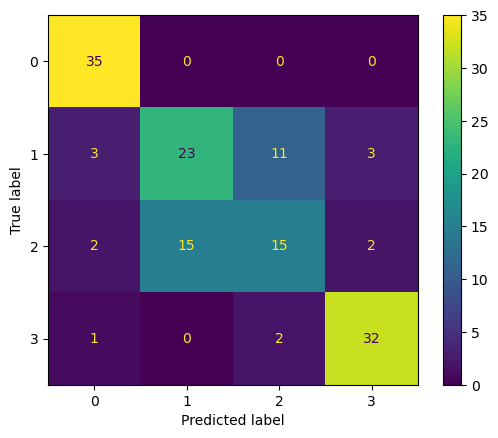

In [39]:
cm = confusion_matrix(y_test,knn.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [40]:
svc=SVC()
svc.fit(X_train_scale,y_train)
svc_score=svc.score(X_test_scale,y_test)
print("Accuracy:",svc_score, "   ","f1_score:",f1_score(y_test,svc.predict(X_test_scale),average='macro'))

Accuracy: 0.7708333333333334     f1_score: 0.7692296918767507


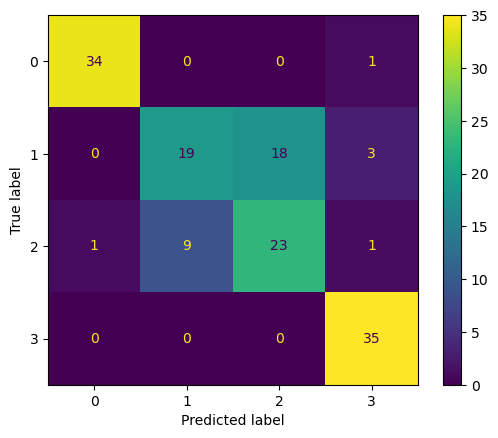

In [41]:
cm = confusion_matrix(y_test,svc.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
DT=DecisionTreeClassifier()
DT.fit(X_train_scale,y_train)
DT_score=DT.score(X_test_scale,y_test)
print("Accuracy:",DT_score, "   ","f1_score:",f1_score(y_test,DT.predict(X_test_scale),average='macro'))

Accuracy: 0.7222222222222222     f1_score: 0.7163784572235277


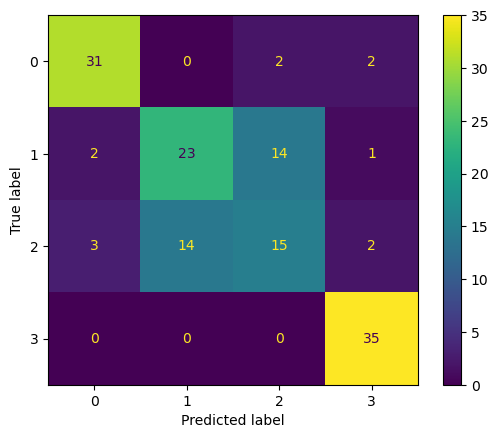

In [43]:
cm = confusion_matrix(y_test,DT.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [45]:

RND=RandomForestClassifier()
RND.fit(X_train_scale,y_train)
RND_score=RND.score(X_test_scale,y_test)
print("Accuracy:",RND_score, "   ","f1_score:",f1_score(y_test,RND.predict(X_test_scale),average='macro'))

Accuracy: 0.7291666666666666     f1_score: 0.7216909216909217


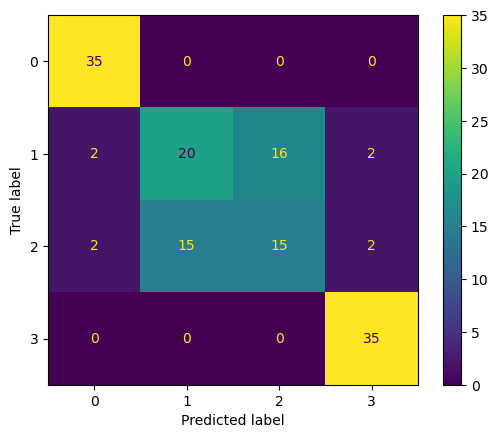

In [46]:
cm = confusion_matrix(y_test,RND.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
GB=GradientBoostingClassifier()
GB.fit(X_train_scale,y_train)
GB_score=GB.score(X_test_scale,y_test)
print("Accuracy:",GB_score, "   ","f1_score:",f1_score(y_test,GB.predict(X_test_scale),average='macro'))

Accuracy: 0.75     f1_score: 0.7456330020592712


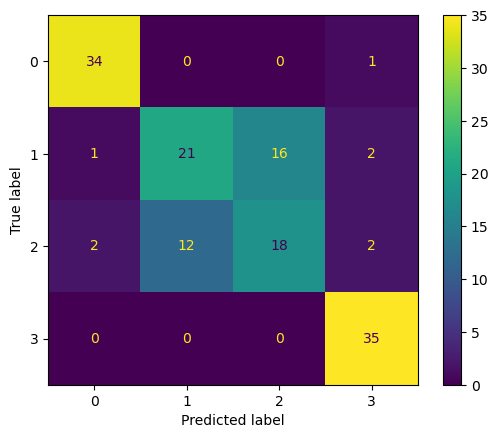

In [49]:
cm = confusion_matrix(y_test,GB.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
  
# fitting the model for grid search
grid.fit(X_train_scale, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [51]:
# print best parameter after tuning
print(grid.best_params_)
  
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [52]:
svc_new=SVC(C=1000,gamma=0.01,kernel='rbf')
svc_new.fit(X_train_scale,y_train)
svc_score=svc_new.score(X_test_scale,y_test)
print("Accuracy:",svc_score, "   ","f1_score:",f1_score(y_test,svc_new.predict(X_test_scale),average='macro'))

Accuracy: 0.8680555555555556     f1_score: 0.8708284409654273


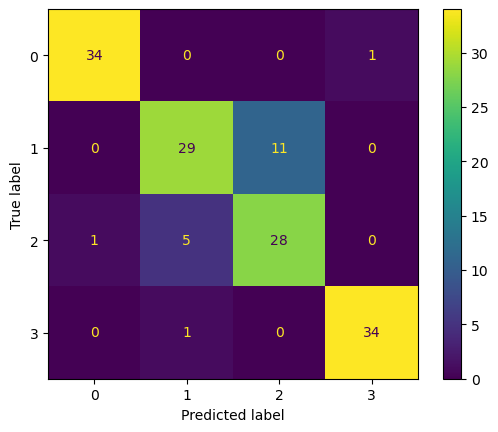

In [53]:
cm = confusion_matrix(y_test,svc_new.predict(X_test_scale))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [54]:
print(classification_report(y_test, svc.predict(X_test_scale))) #without tuning

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.47      0.56        40
           2       0.56      0.68      0.61        34
           3       0.88      1.00      0.93        35

    accuracy                           0.77       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.77      0.77      0.76       144



In [55]:
print(classification_report(y_test, svc_new.predict(X_test_scale))) #with tuning

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.83      0.72      0.77        40
           2       0.72      0.82      0.77        34
           3       0.97      0.97      0.97        35

    accuracy                           0.87       144
   macro avg       0.87      0.87      0.87       144
weighted avg       0.87      0.87      0.87       144

